<a href="https://colab.research.google.com/github/MenakaRajendran/PortfolioProjects/blob/main/Google_Certification_Bellabeat_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'fitbit:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1041311%2F7746251%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240609%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240609T215645Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D45263f21cfbb10f6100483a33ca211f7677894806ec03ac256960a6c23a58e02821809effca5566ba522cb1e1d303605af7eb84d234e8f4bc302f5cc384c6ce30435ea4425eb65868636733216412fcae94611fa72aea0a1dd460b12c578d4b5cb8f2bd6b528443d88bdd03a16dcd88942705b15be9040ec819dc018b0f2e73a006ac2674edb5a3129691594143782d7179bf00982f0fd721a2b48bdb1e33b0448d07eae775b08b6b5ec8a5acd01bd30cab7e6820e57873b488ee5a1e87cba6111e42ceecc44769199eca1416fe841741b1b713b6642f9d6e8912418aa04c163ad73705e5c949dd449b73079294c6cf8a985094e0354b40b56aa5be9cc7d7df5'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSteps

THE MISSION STATEMENT

Bellabeat is a high-tech manufacturer of health-focused products for women. With the immense potential to become a larger player in the
global smart device market, the owners Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart
device fitness data could help unlock new growth opportunities for the company. In order to attain the same, they would like high-level recommendations for how these trends can inform Bellabeat marketing strategy.

PHASE 1: ASK
Questions for analysis:
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

Key Task:
1. Identify the business task:

   *Targeting the market needs that align with the company's smart devices features.
    Upon understanding the trends and making high level recommendations that could be alligned with the Bellsbeat marketing strategy.

2. Consider key stakeholders:

   *The main stakeholders here are Urška Sršen, Bellabeat’s co-founder and Chief Creative Officer; Sando Mur, Mathematician and Bellabeat’s cofounder
    and the rest of the Bellabeat marketing analytics team.

3. Business Task:

   *The business task is to determine the usage trends of Bellabeat devices in the market
    that will impact the strategy to improve the market through data-driven decisions.
    
    PHASE 2: PREPARE

Key Objectives:

1.Data storage and Integrity:
  * The Bellabeat data is available in the Kaggle and the usability rate is 8.75

2.Credibility of the data:
  * The fitbit Fitness tracker data is a public dataset with 100% Credibility score.It is a dataset from Thirty eligible Fitbit users consented to the submission of personal tracker data,
including minute-level output for physical activity, heart rate, and sleep monitoring.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import datetime as dt

In [ ]:
#prepare the data
df = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

In [ ]:
df.shape

(940, 15)

In [ ]:
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [ ]:
df.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


In [ ]:
df.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [ ]:
#clean the data
df['Id']= df['Id'].astype(str)
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'],format='%m/%d/%Y')
df.dtypes

Id                                  object
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

In [ ]:
# We create a new column, adding up the "ActiveDistance" columns to see if it's equal to the 'TotalDistance' column, or the 'TrackerDistance' column
df['sum_distance'] = df['VeryActiveDistance'] + df['ModeratelyActiveDistance'] + df['LightActiveDistance'] + df['SedentaryActiveDistance']

# We also notice that 'LoggedActivitiesDistance' have 0.0 in value in most entries, but we filter to find where has more than 0
df.loc[(df['LoggedActivitiesDistance'] > 0),['TotalDistance','TrackerDistance','LoggedActivitiesDistance','sum_distance']]



,TotalDistance,TrackerDistance,LoggedActivitiesDistance,sum_distance
668,5.27,5.27,1.959596,5.08
689,9.71,7.88,4.081692,9.71
693,9.27,9.08,2.785175,9.26
707,8.72,8.68,3.167822,8.73
711,10.29,9.48,4.869783,10.29
712,9.65,8.60,4.851307,9.65
713,8.24,7.48,3.285415,8.25
717,10.98,9.91,4.930550,10.98
718,10.48,9.50,4.942142,10.48
719,11.31,10.41,4.924841,11.32


In [ ]:
df['distance_diff'] = df['TotalDistance'] - df['TrackerDistance']
df['distance_diff'].value_counts()

distance_diff
0.000000    925
1.830000      1
0.190001      1
0.040000      1
0.810000      1
1.049999      1
0.760000      1
1.070000      1
0.980000      1
0.900001      1
1.140000      1
1.160000      1
0.880000      1
0.460000      1
1.160000      1
1.060000      1
Name: count, dtype: int64

The earlier results demonstrate that, although they are not always exactly equal, "TotalDistance" and "TrackerDistance" are generally the same. Additionally, we observe that a small number of entries in the 'LoggedActivitiesDistance' have a value greater than 0. Ultimately, we can observe that the total of the "ActiveDistance" columns equals the "TotalDistance" column, with the exception of a single decimal place owing to rounding up.

The "TotalDistance" column and the "TotalDistance" are equal in the majority of cases (having the TotalDistance higher values), so we must now decide whether to keep all the columns or delete some. Thus, we choose to maintain "TotalDistance."

Regarding the "ActiveDistance" columns, unfortunately, we are unsure of the difference.


In [ ]:
df.query('distance_diff > 0.0')

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,sum_distance,distance_diff
689,6962181067,2016-04-21,11835,9.71,7.88,4.081692,3.99,2.10,3.51,0.11,53,27,214,708,2179,9.71,1.830000
693,6962181067,2016-04-25,13239,9.27,9.08,2.785175,3.02,1.68,4.46,0.10,35,31,282,637,2194,9.26,0.190001
707,6962181067,2016-05-09,12342,8.72,8.68,3.167822,3.90,1.18,3.65,0.00,43,21,231,607,2105,8.73,0.040000
711,7007744171,2016-04-12,14172,10.29,9.48,4.869783,4.50,0.38,5.41,0.00,53,8,355,1024,2937,10.29,0.810000
712,7007744171,2016-04-13,12862,9.65,8.60,4.851307,4.61,0.56,4.48,0.00,56,22,261,1101,2742,9.65,1.049999
713,7007744171,2016-04-14,11179,8.24,7.48,3.285415,2.95,0.34,4.96,0.00,34,6,304,1096,2668,8.25,0.760000
717,7007744171,2016-04-18,14816,10.98,9.91,4.930550,3.79,2.12,5.05,0.02,48,31,284,1077,2832,10.98,1.070000
718,7007744171,2016-04-19,14194,10.48,9.50,4.942142,4.41,0.76,5.31,0.00,53,17,304,1066,2812,10.48,0.980000
719,7007744171,2016-04-20,15566,11.31,10.41,4.924841,4.79,0.67,5.86,0.00,60,33,347,1000,3096,11.32,0.900001
724,7007744171,2016-04-25,18229,13.34,12.20,4.861792,4.31,1.37,7.67,0.00,51,24,379,986,3055,13.35,1.140000


In [ ]:
df['TotalMinutes'] = df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes'] + df['SedentaryMinutes']
df['TotalMinutes']

0      1094
1      1033
2      1440
3       998
4      1040
       ... 
935    1440
936    1440
937    1440
938    1440
939     931
Name: TotalMinutes, Length: 940, dtype: int64

Renaming columns:
Now, let's rename the columns with the rename function. And also we want to turn them into lower case with the function str.lower()

In [ ]:
df.columns = df.columns.str.lower()
df.rename(columns = {'trackerdistance':'tracker_distance','activitydate':'activity_date','totalsteps':'total_steps','totaldistance':'total_distance',
       'loggedactivitiesdistance':'logged_activities_distance', 'veryactivedistance':'very_active_distance',
       'moderatelyactivedistance':'moderately_active_distance', 'lightactivedistance':'light_active_distance',
       'sedentaryactivedistance':'sedentary_active_distance', 'veryactiveminutes':'very_active_minutes',
       'fairlyactiveminutes':'fairly_active_minutes','lightlyactiveminutes':'lightly_active_minutes',
       'sedentaryminutes':'sedentary_minutes'}
         ,inplace=True) # We make the changes permanent by using inplace=True
print('Double check the name of the columns:')
df.columns

Double check the name of the columns:


Index(['id', 'activity_date', 'total_steps', 'total_distance',
       'tracker_distance', 'logged_activities_distance',
       'very_active_distance', 'moderately_active_distance',
       'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       'sum_distance', 'distance_diff', 'totalminutes'],
      dtype='object')

In [ ]:
df.head(4)

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,sum_distance,distance_diff,totalminutes
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,8.49,0.0,1094
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,6.97,0.0,1033
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,6.75,0.0,1440
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,6.23,0.0,998


In [ ]:
df['day_of_week'] = df['activity_date'].dt.day_name()
df['n_day_of_week'] = df['activity_date'].dt.weekday # 0 represents monday, 6 represents sunday

In [ ]:
df.columns

Index(['id', 'activity_date', 'total_steps', 'total_distance',
       'tracker_distance', 'logged_activities_distance',
       'very_active_distance', 'moderately_active_distance',
       'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       'sum_distance', 'distance_diff', 'totalminutes', 'day_of_week',
       'n_day_of_week'],
      dtype='object')

In [ ]:
df.head(4)

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,sum_distance,distance_diff,totalminutes,day_of_week,n_day_of_week
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,8.49,0.0,1094,Tuesday,1
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,6.97,0.0,1033,Wednesday,2
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,6.75,0.0,1440,Thursday,3
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,6.23,0.0,998,Friday,4


In [ ]:
#checking null values
print('Total number of null values are: ')
print(df.isnull().sum())

Total number of null values are: 
id                            0
activity_date                 0
total_steps                   0
total_distance                0
tracker_distance              0
logged_activities_distance    0
very_active_distance          0
moderately_active_distance    0
light_active_distance         0
sedentary_active_distance     0
very_active_minutes           0
fairly_active_minutes         0
lightly_active_minutes        0
sedentary_minutes             0
calories                      0
sum_distance                  0
distance_diff                 0
totalminutes                  0
day_of_week                   0
n_day_of_week                 0
dtype: int64


Checking for duplicate entries using the function duplicated().sum()

In [ ]:
print('Total number of duplicated values are: ',df.duplicated().sum())

Total number of duplicated values are:  0


There are no null values nor duplicated entries

In [ ]:
#subset the data
df = df[['id', 'activity_date', 'total_steps', 'total_distance',
       'very_active_distance', 'moderately_active_distance',
       'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories', 'day_of_week',
       'n_day_of_week']].copy()

In [ ]:
df_sub.head(10)

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,...,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,sum_distance,distance_diff,totalminutes,day_of_week,n_day_of_week,activity_level
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,13,328,728,1985,8.49,0.0,1094,Tuesday,1,very_active
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,19,217,776,1797,6.97,0.0,1033,Wednesday,2,very_active
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,...,11,181,1218,1776,6.75,0.0,1440,Thursday,3,very_active
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,34,209,726,1745,6.23,0.0,998,Friday,4,very_active
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,10,221,773,1863,8.16,0.0,1040,Saturday,5,very_active
5,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,...,20,164,539,1728,6.48,0.0,761,Sunday,6,very_active
6,1503960366,2016-04-18,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,...,16,233,1149,1921,8.60,0.0,1440,Monday,0,very_active
7,1503960366,2016-04-19,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,...,31,264,775,2035,9.88,0.0,1120,Tuesday,1,very_active
8,1503960366,2016-04-20,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,...,12,205,818,1786,6.68,0.0,1063,Wednesday,2,very_active
9,1503960366,2016-04-21,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,...,8,211,838,1775,6.34,0.0,1076,Thursday,3,very_active


Analysis Stage:
    Analysis the datset through the columns total_steps and usage of the device.
    For this analysis, we will be categorizing the two columns on an average.
    
physical activity would follow these arguments:

    Sedentary: less than 5000 daily steps on average
    Active: between 5000 and 10000 daily steps on average
    Very active: more than 10000 daily steps on average

Device usage will follow these arguments:

    Low use: less than 8 hours of use per day.
    Normal use: between 8 and 16 hours of use per day.
    High use: more than 16 hours of use per day.
    

In [ ]:
df['id'].unique() # identifying the users (33)

array(['1503960366', '1624580081', '1644430081', '1844505072',
       '1927972279', '2022484408', '2026352035', '2320127002',
       '2347167796', '2873212765', '3372868164', '3977333714',
       '4020332650', '4057192912', '4319703577', '4388161847',
       '4445114986', '4558609924', '4702921684', '5553957443',
       '5577150313', '6117666160', '6290855005', '6775888955',
       '6962181067', '7007744171', '7086361926', '8053475328',
       '8253242879', '8378563200', '8583815059', '8792009665',
       '8877689391'], dtype=object)

In [ ]:
# grouping the data by the id
id_grp = df.groupby(['id'])

# checking the average amount of steps, and sorting the results in descending order
id_avg_step = id_grp['total_steps'].mean().sort_values(ascending=False)

# assigning the results into a dataframe
id_avg_step = id_avg_step.to_frame()

# creating a new column which tells in which category each user fits into, depending on the average amount of steps
conditions = [
    (id_avg_step <=5000),
    (id_avg_step > 5000) & (id_avg_step < 10000),
    (id_avg_step >= 10000)
] # These are the conditions

values = ['sedentary','active','very_active']

# creating column with the numpy function, np.select to asign each id a category
id_avg_step['activity_level'] = np.select(conditions,values)

# Storing the results in a variable to use it in the next step
id_activity_level = id_avg_step['activity_level']

id_avg_step

,total_steps,activity_level
id,,
8877689391,16040.032258,very_active
8053475328,14763.290323,very_active
1503960366,12116.741935,very_active
2022484408,11370.645161,very_active
7007744171,11323.423077,very_active
3977333714,10984.566667,very_active
4388161847,10813.935484,very_active
6962181067,9794.806452,active
2347167796,9519.666667,active


In [ ]:
# I have used a list comprehension to create the column in our original dataset.
# With this list comprehension I am retrieving the categories where the index match the id column
df['activity_level'] = [id_activity_level[c] for c in df['id']]

df.head(20)

,id,activity_date,total_steps,total_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,day_of_week,n_day_of_week,activity_level
0,1503960366,2016-04-12,13162,8.50,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1,very_active
1,1503960366,2016-04-13,10735,6.97,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,2,very_active
2,1503960366,2016-04-14,10460,6.74,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday,3,very_active
3,1503960366,2016-04-15,9762,6.28,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,4,very_active
4,1503960366,2016-04-16,12669,8.16,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,5,very_active
5,1503960366,2016-04-17,9705,6.48,3.19,0.78,2.51,0.0,38,20,164,539,1728,Sunday,6,very_active
6,1503960366,2016-04-18,13019,8.59,3.25,0.64,4.71,0.0,42,16,233,1149,1921,Monday,0,very_active
7,1503960366,2016-04-19,15506,9.88,3.53,1.32,5.03,0.0,50,31,264,775,2035,Tuesday,1,very_active
8,1503960366,2016-04-20,10544,6.68,1.96,0.48,4.24,0.0,28,12,205,818,1786,Wednesday,2,very_active
9,1503960366,2016-04-21,9819,6.34,1.34,0.35,4.65,0.0,19,8,211,838,1775,Thursday,3,very_active


In [ ]:
print('Number of unique values in id column:',df['id'].nunique())
print()
print('List of id values:',df['id'].unique())

Number of unique values in id column: 33

List of id values: ['1503960366' '1624580081' '1644430081' '1844505072' '1927972279'
 '2022484408' '2026352035' '2320127002' '2347167796' '2873212765'
 '3372868164' '3977333714' '4020332650' '4057192912' '4319703577'
 '4388161847' '4445114986' '4558609924' '4702921684' '5553957443'
 '5577150313' '6117666160' '6290855005' '6775888955' '6962181067'
 '7007744171' '7086361926' '8053475328' '8253242879' '8378563200'
 '8583815059' '8792009665' '8877689391']


In [ ]:
df.describe()

,activity_date,total_steps,total_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,n_day_of_week
count,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,2016-04-26 06:53:37.021276672,7637.910638,5.489702,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,2.918085
min,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-19 00:00:00,3789.750000,2.620000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,1.000000
50%,2016-04-26 00:00:00,7405.500000,5.245000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,3.000000
75%,2016-05-04 00:00:00,10727.000000,7.712500,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,5.000000
max,2016-05-12 00:00:00,36019.000000,28.030001,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,6.000000
std,NaN,5087.150742,3.924606,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,1.942379


The mean or average, the min and max values are available when we use the describe(), the 50% median, etc..

We can already see in the max row that someone walked for 28 miles and someone burned 4900 calories, it could be an outlier

In [ ]:
#Share Phase:
#Correlation between calories steps and calories


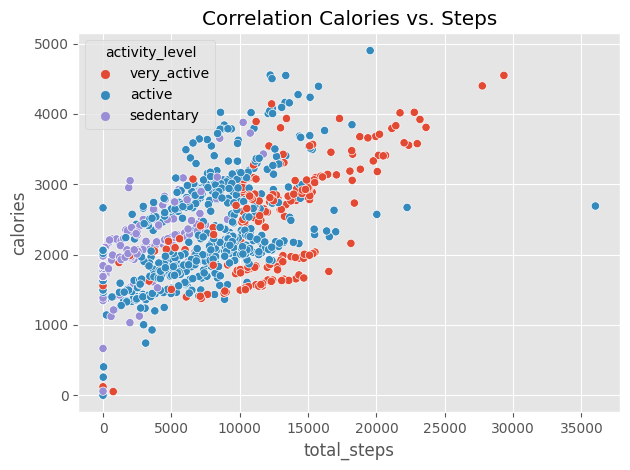

In [ ]:
ax =sns.scatterplot(x='total_steps', y='calories', data=df,hue='activity_level')
plt.title('Correlation Calories vs. Steps')
plt.tight_layout()
plt.show()

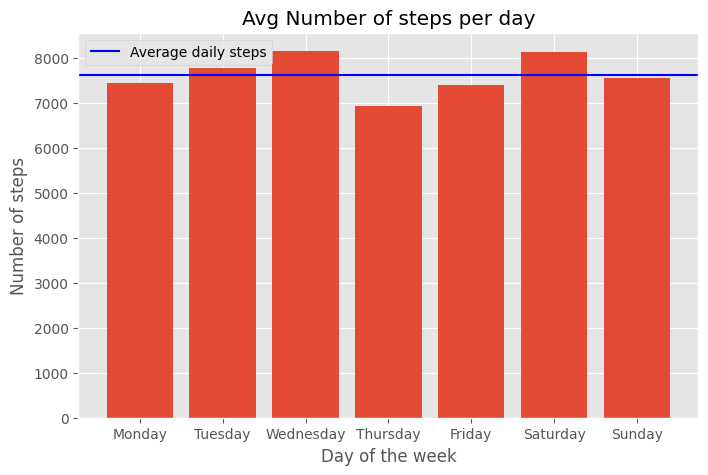

In [ ]:
#average steps per day

day_of_week = ['Monday','Tuesday','Wednesday','Thursday', 'Friday','Saturday','Sunday']
fig, ax = plt.subplots(1,1,figsize=(8,5))
day_grp = df.groupby(['day_of_week'])
avg_daily_steps= day_grp['total_steps'].mean()
avg_steps = df['total_steps'].mean()

plt.bar(avg_daily_steps.index,avg_daily_steps)

ax.set_xticks(range(len(day_of_week)))
ax.set_xticklabels(day_of_week)
ax.axhline(y=avg_daily_steps.mean(),color='blue', label='Average daily steps')

ax.set_ylabel('Number of steps')
ax.set_xlabel('Day of the week')
ax.set_title('Avg Number of steps per day')
plt.legend()
plt.show()

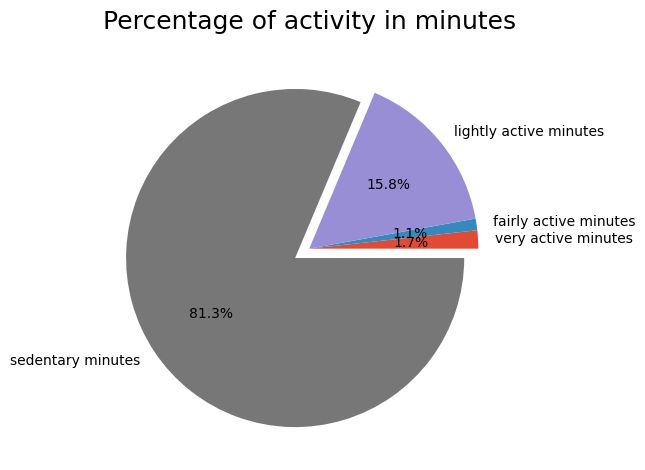

In [ ]:
#Percentage of activity in minutes
very_active_mins = df['very_active_minutes'].sum()
fairly_active_mins = df['fairly_active_minutes'].sum()
lightly_active_mins = df['lightly_active_minutes'].sum()
sedentary_mins = df['sedentary_minutes'].sum()

slices = [very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins]
labels = ['very active minutes','fairly active minutes','lightly active minutes','sedentary minutes']
explode = [0,0,0,0.1]
plt.pie(slices, labels = labels, explode = explode, autopct='%1.1f%%')

plt.title('Percentage of activity in minutes',fontsize=18)
plt.tight_layout()

plt.show()

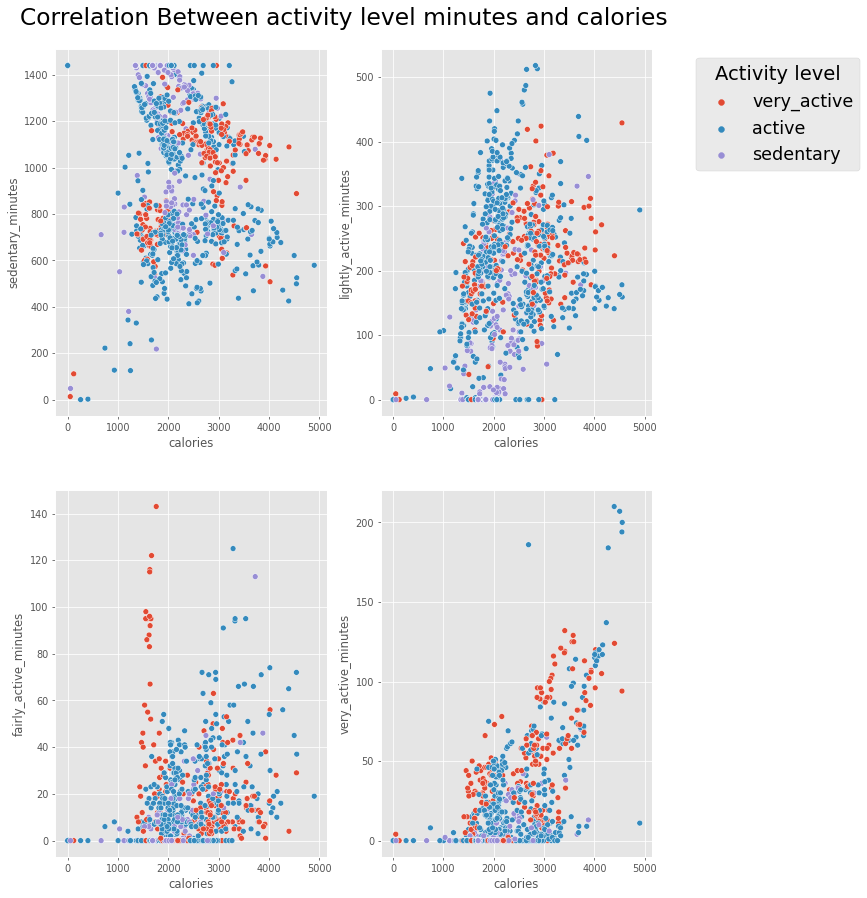

In [ ]:
n_day_of_week = [0,1,2,3,4,5,6]

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(11,15),dpi=70)

sns.scatterplot(data=df,x='calories',y='sedentary_minutes',hue='activity_level',ax=axes[0,0],legend=False)

sns.scatterplot(data=df,x='calories',y='lightly_active_minutes',hue='activity_level',ax=axes[0,1],legend=False)

sns.scatterplot(data=df,x='calories',y='fairly_active_minutes',hue='activity_level',ax=axes[1,0],legend=False)

sns.scatterplot(data=df,x='calories',y='very_active_minutes',hue='activity_level',ax=axes[1,1])


plt.legend(title='Activity level',title_fontsize=20,bbox_to_anchor=(1.8,2.2),fontsize=18,frameon=True,scatterpoints=1)
fig.suptitle('Correlation Between activity level minutes and calories',x=0.5,y=0.92,fontsize=24)
plt.show()

In [ ]:
fig, ax = plt.subplots(2,1)